### Useful links
- [CampusX - Handwritten Digit Classification using ANN](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Shubham Singh - The EMNIST dataset letter recognition](https://www.youtube.com/watch?v=3xPT2Pk0Jds)
- [Emnist classification](https://github.com/sejalgupta01/EMNIST-Classification/blob/master/EMNIST_Classification%20(3).ipynb)
- [Deep learning-Deep understanding by shubham singh](https://www.youtube.com/playlist?list=PL2FZtB-DAFqk4iXGu1xK1_fUmTCjtfQhV)
- [Neural Network from Scratch | Mathematics & Python Code](https://www.youtube.com/watch?v=pauPCy_s0Ok)
- https://github.com/khelli07/ai-fnn/blob/main/README.md
- https://khelli07.medium.com/introduction-to-artificial-neural-network-in-deep-learning-aa7ba2280f50
- https://khelli07.medium.com/feedforward-neural-network-fnn-implementation-from-scratch-using-python-467f51ecca3d
- https://towardsdatascience.com/creating-neural-networks-from-scratch-in-python-6f02b5dd911
- https://subscription.packtpub.com/book/data/9781789346640/1/ch01lvl1sec05/feed-forward-propagation-from-scratch-in-python
- [Softmax Layer from Scratch ](https://www.youtube.com/watch?v=AbLvJVwySEo)

### Dependencies

In [1313]:
# ! pip install torchvision
# ! pip install tqdm
# ! pip install matplotlib
# ! pip install scikit-learn

In [1314]:
# fix random seed
import numpy as np
np.random.seed(0)
np.random.RandomState(0)

# torch random seed
import torch
torch.manual_seed(0)

import torchvision.datasets as ds
import torchvision.transforms as transforms
from tqdm import tqdm

### Dataset

In [1315]:
# Download the training and validation datasets
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    train_val_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=True,
        download=True,
        transform=transforms.ToTensor(),
    )
    pbar.update()

Loading dataset:   0%|           [ time left: ? ]

Loading dataset: 100%|██████████ [ time left: 00:00 ]


In [1316]:
print(f" train validation dataset lenth: {len(train_val_ds)}")
# print shape
print(f" shape: {train_val_ds.data.shape}")
# print number of classes
print(f" number of classes: {len(train_val_ds.classes)}")
# print classes
print(f" classes: {train_val_ds.classes}")

 train validation dataset lenth: 124800
 shape: torch.Size([124800, 28, 28])
 number of classes: 27
 classes: ['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [1317]:
with tqdm(total=1, desc="Loading dataset", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
    test_ds = ds.EMNIST(
        root="./data",
        split="letters",
        train=False,
        transform=transforms.ToTensor(),
    )
pbar.update()

Loading dataset:   0%|           [ time left: ? ]


In [1318]:
print(f"test dataset lenth: {len(test_ds)}")

test dataset lenth: 20800


### Preprocessing

In [1319]:
# get labels
labels = np.array(train_val_ds.targets)
# get unique labels
unique_labels = np.unique(labels)

# print number of samples per class
for label in unique_labels:
    print(f"number of samples for class {label}: {np.sum(labels == label)}")

number of samples for class 1: 4800
number of samples for class 2: 4800
number of samples for class 3: 4800
number of samples for class 4: 4800
number of samples for class 5: 4800
number of samples for class 6: 4800
number of samples for class 7: 4800
number of samples for class 8: 4800
number of samples for class 9: 4800
number of samples for class 10: 4800
number of samples for class 11: 4800
number of samples for class 12: 4800
number of samples for class 13: 4800
number of samples for class 14: 4800
number of samples for class 15: 4800
number of samples for class 16: 4800
number of samples for class 17: 4800
number of samples for class 18: 4800
number of samples for class 19: 4800
number of samples for class 20: 4800
number of samples for class 21: 4800
number of samples for class 22: 4800
number of samples for class 23: 4800
number of samples for class 24: 4800
number of samples for class 25: 4800
number of samples for class 26: 4800


In [1320]:
# to the same with tensor operations
print(f"number of samples for class 'N/A'(0): {torch.sum(train_val_ds.targets == 0)}")
# if the count is 0, then it can cause problem with one hot encoding

number of samples for class 'N/A'(0): 0


In [1321]:
print(train_val_ds.class_to_idx)

{'N/A': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [1322]:
# remove 'N/A' label and decrease all labels by 1
train_val_ds.targets = train_val_ds.targets - 1
test_ds.targets = test_ds.targets - 1

train_val_ds.classes = train_val_ds.classes[1:]
test_ds.classes = test_ds.classes[1:]

In [1323]:
# print number of samples per class
for label in torch.unique(train_val_ds.targets):
    print(f"number of samples for class {label}: {torch.sum(train_val_ds.targets == label)}")

number of samples for class 0: 4800
number of samples for class 1: 4800
number of samples for class 2: 4800
number of samples for class 3: 4800
number of samples for class 4: 4800
number of samples for class 5: 4800
number of samples for class 6: 4800
number of samples for class 7: 4800
number of samples for class 8: 4800
number of samples for class 9: 4800
number of samples for class 10: 4800
number of samples for class 11: 4800
number of samples for class 12: 4800
number of samples for class 13: 4800
number of samples for class 14: 4800
number of samples for class 15: 4800
number of samples for class 16: 4800
number of samples for class 17: 4800
number of samples for class 18: 4800
number of samples for class 19: 4800
number of samples for class 20: 4800
number of samples for class 21: 4800
number of samples for class 22: 4800
number of samples for class 23: 4800
number of samples for class 24: 4800
number of samples for class 25: 4800


In [1324]:
print(train_val_ds.class_to_idx)
print(test_ds.class_to_idx)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


#### Data Normalization

In [1325]:
# next issue: do we need to normalize the data?
%matplotlib inline
import matplotlib.pyplot as plt

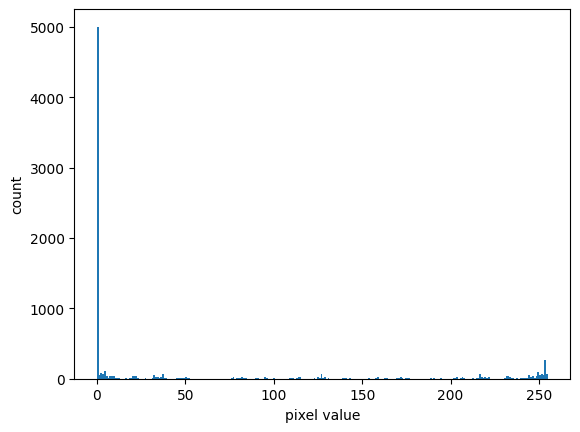

In [1326]:
# plot histogram for 1st 10 samples
plt.hist(train_val_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

In [1327]:
# normalize the data
train_val_ds.data = train_val_ds.data / torch.max(train_val_ds.data)
test_ds.data = test_ds.data / torch.max(test_ds.data)

In [1328]:
# print min and max values
print(f"min value: {torch.min(train_val_ds.data)}")
print(f"max value: {torch.max(train_val_ds.data)}")

min value: 0.0
max value: 1.0


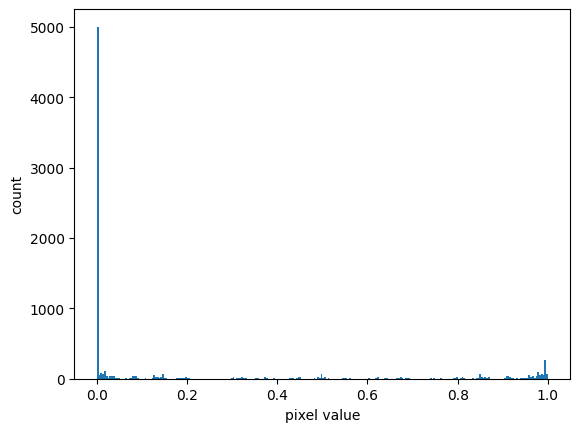

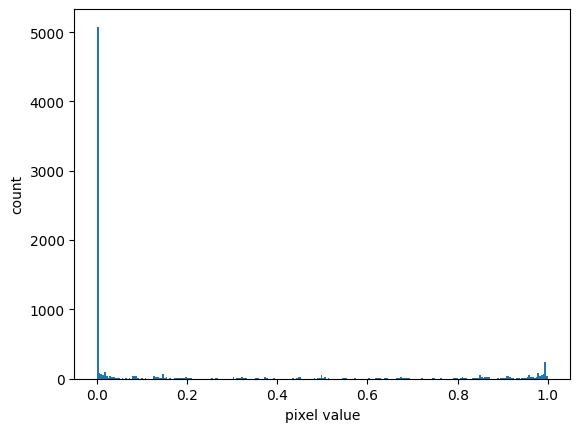

In [1329]:
# plot histogram for 1st 10 samples
plt.hist(train_val_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

# plot for test data
plt.hist(test_ds.data[:10].numpy().ravel(), bins=256)
plt.xlabel("pixel value")
plt.ylabel("count")
plt.show()

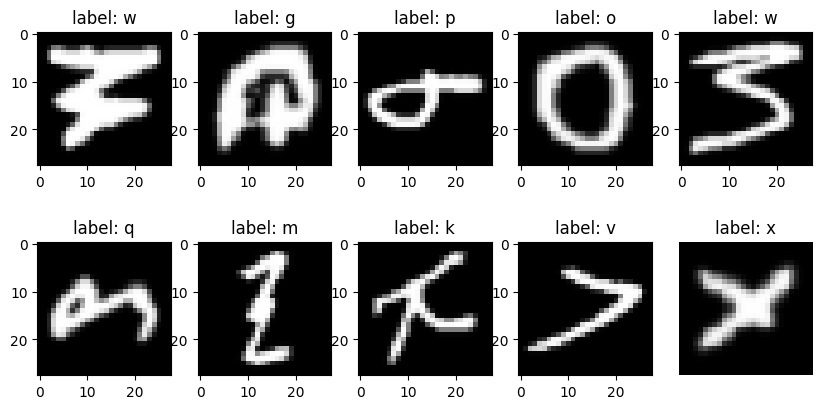

In [1330]:
# visualize the data
# plot 1st 10 samples

# create figure
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

# plot 1st 10 samples
for i, ax in enumerate(ax.flatten()):
    ax.imshow(train_val_ds.data[i], cmap="gray")
    # access label as letter
    letter = train_val_ds.classes[train_val_ds.targets[i]]
    ax.set_title(f"label: {letter}")

# remove axis
plt.axis("off")
# show plot
plt.show()

In [1331]:
# # one hot encoding the data with scikit-learn
# from sklearn.preprocessing import OneHotEncoder

# # create one hot encoder
# one_hot_encoder = OneHotEncoder()

# # fit one hot encoder
# one_hot_encoder.fit(train_validation_ds.targets.reshape(-1, 1))

# # transform targets
# train_validation_ds.targets = one_hot_encoder.transform(train_validation_ds.targets.reshape(-1, 1)).toarray()

# # transform targets
# test_ds.targets = one_hot_encoder.transform(test_ds.targets.reshape(-1, 1)).toarray()


# # convert to tensor
# train_validation_ds.targets = torch.tensor(train_validation_ds.targets)
# test_ds.targets = torch.tensor(test_ds.targets)

# # print shape
# print(f"train validation targets shape: {train_validation_ds.targets.shape}")

### Train-validation split
The dataset contains 28x28 images of letters from the Latin alphabet. Split the train-validation dataset as 85%-15% to form your train set and validation set. 

In [1332]:
# convert torch to numpy
train_val_ds.data = train_val_ds.data.numpy()
train_val_ds.targets = train_val_ds.targets.numpy()

# convert torch to numpy
test_ds.data = test_ds.data.numpy()
test_ds.targets = test_ds.targets.numpy()

In [1333]:
# use sklearn to split train_validation_dataset into train and validation datasets
from sklearn.model_selection import train_test_split

val_per = 0.15 # validation percentage

# split train_validation_dataset into train and validation datasets as 85% and 15% respectively
train_ds, val_ds, train_labels, val_labels = train_test_split(
    train_val_ds.data,
    train_val_ds.targets,
    test_size=val_per,
    random_state=1,
)

In [1334]:
print(f"train dataset length: {len(train_ds)}")
print(f"validation dataset length: {len(val_ds)}")

train dataset length: 106080
validation dataset length: 18720


In [1335]:
# print data type
print(f"train_ds shape: {train_ds.shape}")
print(f"train_ds type: {type(train_ds)}")
print(f"cell data type: {train_ds.dtype}")

# print label
print(f"\ntrain_labels shape: {train_labels.shape}")
print(f"train_labels type: {type(train_labels)}")
print(f"cell data type: {train_labels.dtype}")

n = 2
# print 1st 5 data
print(f"\ntrain_ds 1st 10 data: {train_ds[:n]}")
# print 1st 5 labels
print(f"train_labels 1st 10 data: {train_labels[:n]}")

train_ds shape: (106080, 28, 28)
train_ds type: <class 'numpy.ndarray'>
cell data type: float32

train_labels shape: (106080,)
train_labels type: <class 'numpy.ndarray'>
cell data type: int64

train_ds 1st 10 data: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
train_labels 1st 10 data: [17  1]


In [1336]:
# print 1st 10 labels
print(f"train labels: {train_labels[:10]}")

train labels: [17  1 14 19 21  2 11  9 19 23]


In [1337]:
# print 1st 10 validation labels
print(f"validation labels: {val_labels[:10]}")

validation labels: [12 10 11  8 25 19 18  4 13 15]


### FFN implementation

##### Loss function
As you can see, our example model is currently random. To remedy this, we need a way to
calculate how wrong the neural network is at current predictions and begin adjusting weights
and biases to decrease error over time. Thus, our next step is to quantify how wrong the model is
through what’s defined as a loss function.

In [1338]:
# no matter which loss function we’ll use, the overall loss is always a mean value of all sample losses
# common loss functions
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

##### Activation function

In [1339]:
class Activation:
    def forward(self, inputs):
        raise NotImplementedError
    def backward(self, grad_outputs):
        raise NotImplementedError
    

In [1340]:
# ReLU activation
class ReLU(Activation):
    def forward(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs)
    
    def backward(self, grad_outputs):
        # Since we need to modify original variable,
        # let’s make a copy of values first
        grad_inputs = grad_outputs.copy()

       # print(f"Relu grad_output shape: {grad_outputs.shape}")

        # Zero gradient where input values were negative
        grad_inputs[self.inputs <= 0] = 0

       # print(f"Relu grad_input shape: {grad_inputs.shape}")

        return grad_inputs

In [1341]:
class Softmax(Activation):

    def forward(self, inputs):
        # get row max to subtract from each row
        # this is to prevent overflow
        # the max value in each row will be 0
        # the output will be extactly the same
        row_maxs = np.max(inputs, axis=1, keepdims=True)

        # Get unnormalized probabilities
        # exponentiate values
        exp_values = np.exp(inputs - row_maxs)

        # Get normalization bases for each sample
        norm_bases = np.sum(exp_values, axis=1, keepdims=True)

        # Normalize them for each sample
        probabilities = exp_values / norm_bases

        #print(f"softmax forward output shape: {probabilities.shape}")

        self.output = probabilities

        return probabilities
    

    # back propagation
    def backward(self, grad_output):
        # # Create uninitialized array
        # input_grads = np.empty_like(grad_output)

        # # Enumerate outputs and gradients
        # outputs = Softmax.forward(inputs)
        # # Loop over the samples
        # for idx, (output_grad, output) in enumerate(zip(grad_output, outputs)):
        #     # Flatten output array
        #     single_output = output.reshape(-1, 1)

        #     # Calculate Jacobian matrix of the output
        #     jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

        #     # Calculate sample-wise gradient
        #     # and add it to the array of sample gradients
        #     input_grads[idx] = np.dot(jacobian_matrix, output_grad)

        # return input_grads
       # print(f"softmax-> grad_output shape: {grad_output.shape}")
        grad_input = self.output * (grad_output - np.sum(self.output * grad_output, axis=-1, keepdims=True))
       # print(f"softmax-> grad_input shape: {grad_input.shape}")
        return grad_input

In [1342]:
#test softmax
softmax = Softmax()

# Forward pass
x = np.array([[1.0, 2.0, 3.0]])
y = softmax.forward(x)
print(f"softmax output: {y}")

# Backward pass
# Example gradient from the next layer
grad_output = np.array([[0.1, 0.2, 0.3]])
# Calculate gradient
grad_input = softmax.backward(grad_output)
print(f"softmax gradient: {grad_input}")

softmax output: [[0.09003057 0.24472847 0.66524096]]
softmax gradient: [[-0.01418171 -0.01407704  0.02825875]]


##### Dense layer

In [1362]:
# Dense or fully connected layer
class DenseLayer:
    # Here, we’re setting weights to be random and biases to be 0
    def __init__(self, 
                 n_inputs:int, 
                 n_neurons:int, 
                 activation:Activation,
                 learning_rate:float = 0.001,
                 debug:bool = False,
                 ) -> None:
        # Xavier initialization
        # We divide by n_inputs to reduce the variance of our outputs
        # and make sure that they are all in the same range
        self.weights = np.random.randn(n_inputs, n_neurons) / np.sqrt(n_inputs)

        # print max and min weights
        if debug:
            print(f"weights shape: {self.weights.shape}")
            print(f"weight (min, max) = ({np.min(self.weights)}, {np.max(self.weights)})")
           
        # xaiver initialization
        self.biases = np.zeros((1, n_neurons))

        if debug:
            print(f"baises shape: {self.biases.shape}")
            print(f"bias (min, max) = ({np.min(self.biases)}, {np.max(self.biases)})")
            

        # activation function
        self.activation = activation
        # learning rate
        self.learning_rate = learning_rate

    # Forward pass
    # When we pass data through a model from beginning to end, this is called a forward pass. 
    def forward(self, inputs:np.ndarray):
        # check input shape
        if len(inputs.shape) != 2:
            raise ValueError(f"input shape must be 2D, got {len(inputs.shape)}D")
        
        # save input
        self.inputs = inputs

        # inputs shape: (batch_size, n_inputs)
        # weights shape: (n_inputs, n_neurons)
        # biases shape: (1, n_neurons)
        # output shape: (batch_size, n_neurons) i.e for each sample, we get n_neurons outputs
        out =  np.dot(inputs, self.weights) + self.biases
     
        out = self.activation.forward(out)
        return out
    
    def backward(self, grad_output:np.ndarray):
        # activation function derivative
        grad_output = self.activation.backward(grad_output)

      #  print(f"denselayer-> grad_output shape: {grad_output.shape}")

        # Gradients on parameters
        # dE/dW = dE/dY * dY/dW = dE/dY * X.T
        grad_weights = np.dot(self.inputs.T, grad_output)

        # dE/dB = dE/dY * dY/dB = dE/dY * 1
        grad_biases = grad_output.mean(axis=0) * self.inputs.shape[0]

        # Gradient on values
        # dE/dX = dE/dY * dY/dX = W.T * dE/dY
        grad_inputs = np.dot(grad_output, self.weights.T)

    
        # update parameters
        # vanilla gradient descent optimization
        self.weights -= self.learning_rate * grad_weights 
        self.biases -= self.learning_rate * grad_biases

     #   print(f"denselayer-> grad_input shape: {grad_inputs.shape}")

        return grad_inputs
    

In [1363]:
inputs = [
    [1, 2],
    [3, 4],
    [5, 6]
]

dense1 = DenseLayer(2, 4, ReLU(), debug=True)
dense1.forward(np.array(inputs))

weights shape: (2, 4)
weight (min, max) = (-0.9996103913800035, 0.7211810688786099)
baises shape: (1, 4)
bias (min, max) = (0.0, 0.0)


array([[0.62795299, 1.64909138, 0.33881513, 0.        ],
       [1.34835404, 3.50491199, 0.48266677, 0.        ],
       [2.06875508, 5.36073261, 0.62651842, 0.        ]])

In [1364]:
inputs = [
    [1, 2],
    [3, 4],
    [5, 6]
]

dense1 = DenseLayer(2, 4, Softmax())
dense1.forward(np.array(inputs))

array([[5.68205615e-01, 1.39065649e-01, 3.76052972e-03, 2.88968205e-01],
       [3.71025502e-01, 3.20947626e-02, 8.74205591e-06, 5.96870993e-01],
       [1.63417450e-01, 4.99625844e-03, 1.37080147e-08, 8.31586278e-01]])

#### Categorical cross entropy derivative

In [1365]:
class CategoricalCrossEntropyLoss(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values-only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        
        return negative_log_likelihoods
    
    def backward(self, y_pred, y_true):
        # Number of samples
        samples = len(y_pred)

        # Number of labels in every sample
        # We’ll use the first sample to count them
        labels = len(y_pred[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        epsilon = 1e-7

        # Calculate gradient
        grad_output = -y_true / (y_pred+epsilon)
        # Normalize gradient
        grad_output = grad_output / samples

        return grad_output

#### Emnist model

In [1385]:
class History:
    def __init__(self) -> None:
        self.loss = []
        self.accuracy = []
        self.val_loss = []
        self.val_accuracy = []
        self.val_f1 = []
    
    def append(self, loss, accuracy, val_loss, val_accuracy, val_f1):
        self.loss.append(loss)
        self.accuracy.append(accuracy)
        self.val_loss.append(val_loss)
        self.val_accuracy.append(val_accuracy)
        self.val_f1.append(val_f1)

In [1397]:
class BestModel:
    def __init__(self) -> None:
        self.layers = None
        self.loss = np.inf
        self.accuracy = 0
        self.f1 = 0 

    def update(self, layers, loss, accuracy, f1):
        if f1 > self.f1:
            self.layers = layers.copy()
            self.loss = loss
            self.accuracy = accuracy
            self.f1 = f1

In [1378]:
# import pickle
import pickle
# import sklern for f1 score
from sklearn.metrics import f1_score

In [1386]:
class EmnistModel:
    def __init__(
            self, 
            input_size: int = 784, # 28 * 28
            output_size: int = 26, # 26 letters
            hidden_layers_size: list=[64, 64],
            activations: list=[ReLU(), ReLU()],
            loss:Loss = CategoricalCrossEntropyLoss(),
            learning_rate:float = 0.005,
            ) -> None:
        
        # initialize layers
        self.layers = []

        # create hidden layers
        for i, hidden_layer_size in enumerate(hidden_layers_size):
            # if it is the 1st hidden layer
            if i == 0:
                # input size is the input size of the model
                input_size = input_size
            else:
                # input size is the output size of the previous layer
                input_size = hidden_layers_size[i-1]
            
            # create hidden layer
            self.layers.append(
                DenseLayer(
                    input_size,
                    hidden_layer_size,
                    activations[i],
                    learning_rate=learning_rate,
                    debug=True
                )
            )

        # create output layer
        self.layers.append(
            DenseLayer(
                hidden_layers_size[-1],
                output_size,
                Softmax(),
                learning_rate=learning_rate,
                debug=True
            )
        )

        # set loss and learning rate
        self.loss = loss
        self.learning_rate = learning_rate

    def model_summary(self):
        # print model summary
        print(f"Model summary")
        print(f"==============")
        print(f"Input size: {self.layers[0].weights.shape[0]}")
        for i, layer in enumerate(self.layers):
            print(f"Layer {i+1} (input, output) size: {layer.weights.shape}")
        print(f"Output size: {self.layers[-1].weights.shape[1]}")
        print(f"Loss: {self.loss.__class__.__name__}")
        print(f"Learning rate: {self.learning_rate}\n")

    def save(self, path):
        for l in self.layers:
            if l.inputs is not None:
                l.inputs = None
        # save model
        with open(path, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(path):
        # load model
        with open(path, "rb") as f:
            return pickle.load(f)

    def forward(self, inputs):
        # forward pass
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs
    
    def backward(self, grads_output):
        # backward pass
        for layer in reversed(self.layers):
            grads_output = layer.backward(grads_output)
        return grads_output
    
    def shuffle_data(self, X:np.ndarray, y:np.ndarray):
        # X and y has different shape
        # so we need to shuffle them together
        # create random index
        random_index = np.random.permutation(len(X))
        # shuffle X and y
        return X[random_index], y[random_index]
    
    def evaluate(self, X, y):
        # forward pass
        output = self.forward(X)
        # calculate loss
        loss = self.loss.calculate(output, y)
        # get predictions and calculate accuracy
        predictions = np.argmax(output, axis=1)
        accuracy = np.mean(predictions == y)
        f1 = f1_score(y, predictions, average="macro")
        return loss, accuracy, f1
    
    
    def train(self, X, y, epochs, batch_size, validation_data):
        # initialize progress bar
        with tqdm(total=epochs, desc="Training", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:

            # initialize history
            self.history = History()

            # initialize best model
            self.best = BestModel()

            # train loop
            for epoch in range(epochs):
                # shuffle data
                X, y = self.shuffle_data(X, y)

                # initialize loss and accuracy
                epoch_loss = 0
                epoch_accuracy = 0

                steps = X.shape[0] // batch_size
                if X.shape[0] % batch_size != 0:
                    steps += 1


                # iterate over batches
                for batch in range(steps):
                    # get batch
                    X_batch = X[batch * batch_size: (batch + 1) * batch_size]
                    y_batch = y[batch * batch_size: (batch + 1) * batch_size]

                    # forward pass, calculate loss and accuracy
                    # then backward pass, update parameters
                    
                    output = self.forward(X_batch)

                    # calculate loss
                    loss = self.loss.calculate(output, y_batch)

                    # get predictions and calculate accuracy
                    predictions = np.argmax(output, axis=1)
                    accuracy = np.mean(predictions == y_batch)

                    # update loss and accuracy
                    epoch_loss += loss
                    epoch_accuracy += accuracy

                    # backward pass
                    # print(output)
                    grad_loss = self.loss.backward(output, y_batch)
                    # print(f"grad loss shape: {grad_loss.shape}")
                    self.backward(grad_loss)

                
                print(f"epoch: {epoch+1}/{epochs}, loss: {epoch_loss / steps}, accuracy: {epoch_accuracy / steps}")

                # validation loss and accuracy
                val_loss, val_accuracy, val_f1 = self.evaluate(validation_data[0], validation_data[1])
                print(f"validation loss: {val_loss}, validation accuracy: {val_accuracy}, validation f1: {val_f1}\n")

                # append to history
                self.history.append(epoch_loss / steps, epoch_accuracy / steps, val_loss, val_accuracy, val_f1)

                # update best model
                self.best.update(self.layers, val_loss, val_accuracy, val_f1)
                
                pbar.update()
        
        return self.history
    
    

### Training

##### Building the model

In [1387]:
print(train_ds.shape)
input_shape = train_ds.shape[1:]
input_size = np.prod(input_shape)
print(f"input shape: {input_shape}")
print(f"input size: {input_size}")

(106080, 784)
input shape: (784,)
input size: 784


In [1388]:
output_size = len(np.unique(train_labels))
print(f"output size: {output_size}")

output size: 26


In [1389]:
# flatten train_ds and val_ds
train_ds = train_ds.reshape(train_ds.shape[0], -1)
val_ds = val_ds.reshape(val_ds.shape[0], -1)

print(train_ds.shape)

(106080, 784)


In [1390]:
model = EmnistModel(
    input_size=input_size,
    output_size=output_size,
    hidden_layers_size=[1024, 512, 64],
    activations=[ReLU(), ReLU(), ReLU()],
    learning_rate=0.005,
)

model.model_summary()

weights shape: (784, 1024)
weight (min, max) = (-0.16637026663669066, 0.15855333549117248)
baises shape: (1, 1024)
bias (min, max) = (0.0, 0.0)
weights shape: (1024, 512)
weight (min, max) = (-0.15103045059679354, 0.14114306825240572)
baises shape: (1, 512)
bias (min, max) = (0.0, 0.0)
weights shape: (512, 64)
weight (min, max) = (-0.1771898212125219, 0.20163712436089173)
baises shape: (1, 64)
bias (min, max) = (0.0, 0.0)
weights shape: (64, 26)
weight (min, max) = (-0.4390900897359207, 0.368923971813265)
baises shape: (1, 26)
bias (min, max) = (0.0, 0.0)
Model summary
Input size: 784
Layer 1 (input, output) size: (784, 1024)
Layer 2 (input, output) size: (1024, 512)
Layer 3 (input, output) size: (512, 64)
Layer 4 (input, output) size: (64, 26)
Output size: 26
Loss: CategoricalCrossEntropyLoss
Learning rate: 0.005



##### Runnig the model

In [1391]:
history = model.train(
    X=train_ds,
    y=train_labels,
    epochs=100,
    batch_size=64,
    validation_data=(val_ds, val_labels)
)

Training:   0%|           [ time left: ? ]

epoch: 1/100, loss: 2.4650565229326786, accuracy: 0.38898522316043427


Training:   1%|           [ time left: 1:28:58 ]

validation loss: 1.5664574071411161, validation accuracy: 0.5736645299145299, validation f1: 0.5652278207910018

epoch: 2/100, loss: 1.3039616766643434, accuracy: 0.626564384800965


Training:   2%|▏          [ time left: 1:25:55 ]

validation loss: 1.1665072771822451, validation accuracy: 0.6652243589743589, validation f1: 0.6628610355709476

epoch: 3/100, loss: 1.061981792664521, accuracy: 0.6928716827503015


Training:   3%|▎          [ time left: 1:23:07 ]

validation loss: 1.0177819559671433, validation accuracy: 0.7118055555555556, validation f1: 0.7106593413360629

epoch: 4/100, loss: 0.9240871170449914, accuracy: 0.7328200392038601


Training:   4%|▍          [ time left: 1:27:44 ]

validation loss: 0.8962972236130498, validation accuracy: 0.7374465811965812, validation f1: 0.7369419156475997

epoch: 5/100, loss: 0.8183862157531514, accuracy: 0.7635894149577804


Training:   5%|▌          [ time left: 1:35:30 ]

validation loss: 0.8025087727469157, validation accuracy: 0.7649038461538461, validation f1: 0.7633598053729735

epoch: 6/100, loss: 0.7327903010519495, accuracy: 0.7883180036188179


Training:   6%|▌          [ time left: 1:28:48 ]

validation loss: 0.720989772077247, validation accuracy: 0.7915064102564102, validation f1: 0.7906916837850637

epoch: 7/100, loss: 0.6633603193489798, accuracy: 0.8068738691194209


Training:   7%|▋          [ time left: 1:25:04 ]

validation loss: 0.6650120339061858, validation accuracy: 0.8075320512820513, validation f1: 0.8060867768004628

epoch: 8/100, loss: 0.6066703208031053, accuracy: 0.8228475572979493


Training:   8%|▊          [ time left: 1:21:29 ]

validation loss: 0.6167704827971482, validation accuracy: 0.8192307692307692, validation f1: 0.8191718634411036

epoch: 9/100, loss: 0.5602875635896795, accuracy: 0.8357490199034981


Training:   9%|▉          [ time left: 1:18:29 ]

validation loss: 0.5757523935796246, validation accuracy: 0.8280448717948717, validation f1: 0.8277389489858579

epoch: 10/100, loss: 0.5212780125490878, accuracy: 0.8468504975874548


Training:  10%|█          [ time left: 1:17:06 ]

validation loss: 0.5451482421496777, validation accuracy: 0.8383012820512821, validation f1: 0.8382213859503699

epoch: 11/100, loss: 0.4886413363588123, accuracy: 0.8556053980699638


Training:  11%|█          [ time left: 1:15:39 ]

validation loss: 0.5121004949116539, validation accuracy: 0.8472222222222222, validation f1: 0.8468681784776769

epoch: 12/100, loss: 0.46085049709149467, accuracy: 0.8634178980699638


Training:  12%|█▏         [ time left: 1:13:47 ]

validation loss: 0.48870659685471746, validation accuracy: 0.8536324786324786, validation f1: 0.8533589749573953

epoch: 13/100, loss: 0.43583550902231954, accuracy: 0.8696660132689988


Training:  13%|█▎         [ time left: 1:13:18 ]

validation loss: 0.46931489497554596, validation accuracy: 0.8583867521367521, validation f1: 0.858058252144205

epoch: 14/100, loss: 0.415271413560545, accuracy: 0.8753675361881785


Training:  14%|█▍         [ time left: 1:11:47 ]

validation loss: 0.44950873353503706, validation accuracy: 0.8633547008547009, validation f1: 0.8630109566009113

epoch: 15/100, loss: 0.39636073655143583, accuracy: 0.8802208986731002


Training:  15%|█▌         [ time left: 1:10:21 ]

validation loss: 0.4354421209713507, validation accuracy: 0.8697115384615385, validation f1: 0.8696298061310554

epoch: 16/100, loss: 0.3794849522631726, accuracy: 0.8851213811821471


Training:  16%|█▌         [ time left: 1:09:38 ]

validation loss: 0.43085518717215526, validation accuracy: 0.868482905982906, validation f1: 0.8677330592147533

epoch: 17/100, loss: 0.3643530392120543, accuracy: 0.8897014475271411


Training:  17%|█▋         [ time left: 1:07:45 ]

validation loss: 0.4075233978821821, validation accuracy: 0.8758547008547009, validation f1: 0.8755533526401735

epoch: 18/100, loss: 0.35059616408964794, accuracy: 0.8937914656212304


Training:  18%|█▊         [ time left: 1:06:11 ]

validation loss: 0.39947533958403214, validation accuracy: 0.8779380341880342, validation f1: 0.8777487465068815

epoch: 19/100, loss: 0.3383804423277286, accuracy: 0.8967411791314838


Training:  19%|█▉         [ time left: 1:04:39 ]

validation loss: 0.3888360153609721, validation accuracy: 0.8802350427350427, validation f1: 0.8797357437890677

epoch: 20/100, loss: 0.32683368888417613, accuracy: 0.8997568606755126


Training:  20%|██         [ time left: 1:03:21 ]

validation loss: 0.37911599976713184, validation accuracy: 0.8838141025641025, validation f1: 0.8839209463547119

epoch: 21/100, loss: 0.3164914008922819, accuracy: 0.903743214716526


Training:  21%|██         [ time left: 1:02:05 ]

validation loss: 0.3694099391162877, validation accuracy: 0.8871260683760683, validation f1: 0.8868965117466595

epoch: 22/100, loss: 0.30611577426665115, accuracy: 0.9064007840772015


Training:  22%|██▏        [ time left: 1:00:42 ]

validation loss: 0.3680213333890682, validation accuracy: 0.8873397435897435, validation f1: 0.8872613708643592

epoch: 23/100, loss: 0.2972207381591928, accuracy: 0.9083798250904704


Training:  23%|██▎        [ time left: 59:53 ]  

validation loss: 0.3600996537156295, validation accuracy: 0.8872329059829059, validation f1: 0.8873278314015434

epoch: 24/100, loss: 0.2885507067229883, accuracy: 0.9107829463208685


Training:  24%|██▍        [ time left: 59:11 ]

validation loss: 0.354436362215793, validation accuracy: 0.88883547008547, validation f1: 0.888696970145138

epoch: 25/100, loss: 0.2809707825749722, accuracy: 0.9131012515078407


Training:  25%|██▌        [ time left: 58:16 ]

validation loss: 0.3459797570432502, validation accuracy: 0.8931089743589744, validation f1: 0.8929104024015071

epoch: 26/100, loss: 0.27302116313569014, accuracy: 0.9158907569360676


Training:  26%|██▌        [ time left: 57:08 ]

validation loss: 0.3476887046364261, validation accuracy: 0.8922542735042736, validation f1: 0.8921984708599466

epoch: 27/100, loss: 0.26599414799677934, accuracy: 0.9178038299155609


Training:  27%|██▋        [ time left: 56:32 ]

validation loss: 0.34004131412266875, validation accuracy: 0.8932692307692308, validation f1: 0.8931054546057842

epoch: 28/100, loss: 0.25918609797662934, accuracy: 0.9192268546441495


Training:  28%|██▊        [ time left: 55:39 ]

validation loss: 0.3347998845821738, validation accuracy: 0.895673076923077, validation f1: 0.895560150201466

epoch: 29/100, loss: 0.2529352530153149, accuracy: 0.9213001357056695


Training:  29%|██▉        [ time left: 54:53 ]

validation loss: 0.32962124553586936, validation accuracy: 0.8973290598290599, validation f1: 0.8974200623253419

epoch: 30/100, loss: 0.24650485984872103, accuracy: 0.9229870325693607


Training:  30%|███        [ time left: 54:04 ]

validation loss: 0.33342927132666295, validation accuracy: 0.893482905982906, validation f1: 0.8927976278325107

epoch: 31/100, loss: 0.2408633083144216, accuracy: 0.9252205217129071


Training:  31%|███        [ time left: 53:10 ]

validation loss: 0.32749190186520694, validation accuracy: 0.8993055555555556, validation f1: 0.89903100529793

epoch: 32/100, loss: 0.23532844989138396, accuracy: 0.926766058504222


Training:  32%|███▏       [ time left: 52:22 ]

validation loss: 0.3207922401722185, validation accuracy: 0.9000534188034188, validation f1: 0.8999939598291251

epoch: 33/100, loss: 0.22936006004011378, accuracy: 0.927708458986731


Training:  33%|███▎       [ time left: 51:45 ]

validation loss: 0.3188515725675852, validation accuracy: 0.8998931623931624, validation f1: 0.8998086645869682

epoch: 34/100, loss: 0.22434745248356622, accuracy: 0.9299796441495778


Training:  34%|███▍       [ time left: 51:03 ]

validation loss: 0.3254253989277602, validation accuracy: 0.8988247863247864, validation f1: 0.898597903778316

epoch: 35/100, loss: 0.21947068026271704, accuracy: 0.9311859167671894


Training:  35%|███▌       [ time left: 50:06 ]

validation loss: 0.3168911977960546, validation accuracy: 0.9004273504273504, validation f1: 0.9002688132710385

epoch: 36/100, loss: 0.21442195923615426, accuracy: 0.9320435012062727


Training:  36%|███▌       [ time left: 49:28 ]

validation loss: 0.31486711507408804, validation accuracy: 0.9010149572649573, validation f1: 0.9008885589177628

epoch: 37/100, loss: 0.20939656296453688, accuracy: 0.9340979342581424


Training:  37%|███▋       [ time left: 48:51 ]

validation loss: 0.3125241120369282, validation accuracy: 0.9008012820512821, validation f1: 0.900543402445054

epoch: 38/100, loss: 0.20517622837904653, accuracy: 0.9352947828709288


Training:  38%|███▊       [ time left: 47:58 ]

validation loss: 0.30930883942944687, validation accuracy: 0.9038461538461539, validation f1: 0.9040327966175099

epoch: 39/100, loss: 0.2011122991457846, accuracy: 0.936359695416164


Training:  39%|███▉       [ time left: 47:04 ]

validation loss: 0.3064456134982127, validation accuracy: 0.9049679487179487, validation f1: 0.9048952669806559

epoch: 40/100, loss: 0.19692173001643068, accuracy: 0.9372172798552473


Training:  40%|████       [ time left: 46:27 ]

validation loss: 0.3062036011639064, validation accuracy: 0.9030982905982906, validation f1: 0.9028812237442415

epoch: 41/100, loss: 0.19274455544229935, accuracy: 0.9388664806996381


Training:  41%|████       [ time left: 45:37 ]

validation loss: 0.30578686434221947, validation accuracy: 0.9038461538461539, validation f1: 0.903884772287729

epoch: 42/100, loss: 0.18877545988817496, accuracy: 0.940308353437877


Training:  42%|████▏      [ time left: 44:52 ]

validation loss: 0.30783945617029784, validation accuracy: 0.9031517094017094, validation f1: 0.9030386479958109

epoch: 43/100, loss: 0.1847148903584219, accuracy: 0.9408078256936068


Training:  43%|████▎      [ time left: 107:47:55 ]

validation loss: 0.30120260803484317, validation accuracy: 0.9064102564102564, validation f1: 0.906397170376303

epoch: 44/100, loss: 0.18101467496921908, accuracy: 0.9421648823884198


Training:  44%|████▍      [ time left: 74:22:39 ] 

validation loss: 0.3055359934961718, validation accuracy: 0.9046474358974359, validation f1: 0.9049179247243366

epoch: 45/100, loss: 0.17682811969289466, accuracy: 0.9436067551266586


Training:  45%|████▌      [ time left: 51:21:41 ]

validation loss: 0.3031308356595743, validation accuracy: 0.9048076923076923, validation f1: 0.9046606597551997

epoch: 46/100, loss: 0.17347835690616867, accuracy: 0.9444454915560917


Training:  46%|████▌      [ time left: 35:32:15 ]

validation loss: 0.30068805204954985, validation accuracy: 0.9058760683760684, validation f1: 0.9058882150141515

epoch: 47/100, loss: 0.17081175792907347, accuracy: 0.9450297798552473


Training:  47%|████▋      [ time left: 24:38:38 ]

validation loss: 0.2983680823497868, validation accuracy: 0.9059294871794872, validation f1: 0.9059951351888758

epoch: 48/100, loss: 0.16673610361751376, accuracy: 0.946669556694813


Training:  48%|████▊      [ time left: 17:08:30 ]

validation loss: 0.2988520829588032, validation accuracy: 0.9048611111111111, validation f1: 0.9051287265015235

epoch: 49/100, loss: 0.1635600372599614, accuracy: 0.9478852533172497


Training:  49%|████▉      [ time left: 11:58:45 ]

validation loss: 0.29831814720664246, validation accuracy: 0.9056623931623932, validation f1: 0.905910860084461

epoch: 50/100, loss: 0.15990624022397, accuracy: 0.949892566344994


Training:  50%|█████      [ time left: 8:26:12 ] 

validation loss: 0.2972617749406192, validation accuracy: 0.9066773504273504, validation f1: 0.906695285876453

epoch: 51/100, loss: 0.15724062141366343, accuracy: 0.9501470144752714


Training:  51%|█████      [ time left: 5:59:02 ]

validation loss: 0.29856641286862007, validation accuracy: 0.905448717948718, validation f1: 0.9056063053489425

epoch: 52/100, loss: 0.15387229969941918, accuracy: 0.9506936067551267


Training:  52%|█████▏     [ time left: 4:17:50 ]

validation loss: 0.29963413497138847, validation accuracy: 0.9068910256410256, validation f1: 0.9068464780185532

epoch: 53/100, loss: 0.1509854092124141, accuracy: 0.9518433353437877


Training:  53%|█████▎     [ time left: 3:08:19 ]

validation loss: 0.30023402159167956, validation accuracy: 0.9060897435897436, validation f1: 0.9058478289007599

epoch: 54/100, loss: 0.14816768442181127, accuracy: 0.9524747436670687


Training:  54%|█████▍     [ time left: 2:20:04 ]

validation loss: 0.3096271795534743, validation accuracy: 0.9018162393162393, validation f1: 0.9019233396015369

epoch: 55/100, loss: 0.1454456586742144, accuracy: 0.9530873039806996


Training:  55%|█████▌     [ time left: 1:47:23 ]

validation loss: 0.3023597851883364, validation accuracy: 0.9082799145299145, validation f1: 0.9084292249143099

epoch: 56/100, loss: 0.14215360039741018, accuracy: 0.954585720747889


Training:  56%|█████▌     [ time left: 1:23:42 ]

validation loss: 0.29992111059984666, validation accuracy: 0.9061431623931624, validation f1: 0.9060696910274377

epoch: 57/100, loss: 0.13938031394555114, accuracy: 0.9553961851628469


Training:  57%|█████▋     [ time left: 1:07:43 ]

validation loss: 0.2970494462659098, validation accuracy: 0.9076388888888889, validation f1: 0.9075254000616695

epoch: 58/100, loss: 0.13683768598310792, accuracy: 0.9564799457177322


Training:  58%|█████▊     [ time left: 55:54 ]  

validation loss: 0.3025807145115263, validation accuracy: 0.903258547008547, validation f1: 0.9025971306373995

epoch: 59/100, loss: 0.13432952761389041, accuracy: 0.9562254975874548


Training:  59%|█████▉     [ time left: 48:09 ]

validation loss: 0.297285929692421, validation accuracy: 0.909241452991453, validation f1: 0.9092875213056618

epoch: 60/100, loss: 0.13149611039545275, accuracy: 0.957921818455971


Training:  60%|██████     [ time left: 42:06 ]

validation loss: 0.30878937183393657, validation accuracy: 0.9048076923076923, validation f1: 0.9046911894599261

epoch: 61/100, loss: 0.1291824776813843, accuracy: 0.9582987786489746


Training:  61%|██████     [ time left: 37:33 ]

validation loss: 0.2995068994915788, validation accuracy: 0.9058226495726496, validation f1: 0.9058609954805988

epoch: 62/100, loss: 0.12633503125162018, accuracy: 0.9598066194209891


Training:  62%|██████▏    [ time left: 35:21 ]

validation loss: 0.2982652740717103, validation accuracy: 0.9087606837606838, validation f1: 0.9089554740876282

epoch: 63/100, loss: 0.12421536825005294, accuracy: 0.9600327955367913


Training:  63%|██████▎    [ time left: 33:30 ]

validation loss: 0.3012366938014709, validation accuracy: 0.9079059829059829, validation f1: 0.9079173838508626

epoch: 64/100, loss: 0.12163553282849975, accuracy: 0.9615217882991556


Training:  64%|██████▍    [ time left: 32:25 ]

validation loss: 0.3042232426814611, validation accuracy: 0.9041132478632479, validation f1: 0.903079971987434

epoch: 65/100, loss: 0.11960503736870491, accuracy: 0.9618327804583836


Training:  65%|██████▌    [ time left: 31:36 ]

validation loss: 0.30334605941609444, validation accuracy: 0.907051282051282, validation f1: 0.9069502870974783

epoch: 66/100, loss: 0.11710211003846174, accuracy: 0.9623699487334137


Training:  66%|██████▌    [ time left: 29:52 ]

validation loss: 0.3029688464120215, validation accuracy: 0.9082799145299145, validation f1: 0.9081898203687

epoch: 67/100, loss: 0.11491754106083736, accuracy: 0.9630296290711701


Training:  67%|██████▋    [ time left: 28:14 ]

validation loss: 0.3042707726374967, validation accuracy: 0.9071047008547009, validation f1: 0.9069505341612535

epoch: 68/100, loss: 0.11314102167904563, accuracy: 0.9634914053075995


Training:  68%|██████▊    [ time left: 27:07 ]

validation loss: 0.30670270716674103, validation accuracy: 0.9053952991452991, validation f1: 0.9051252359030898

epoch: 69/100, loss: 0.11124016299784521, accuracy: 0.9650746381182147


Training:  69%|██████▉    [ time left: 26:21 ]

validation loss: 0.3124503941038923, validation accuracy: 0.9029380341880342, validation f1: 0.9023895700395616

epoch: 70/100, loss: 0.10919521584499309, accuracy: 0.9651123341375151


Training:  70%|███████    [ time left: 25:34 ]

validation loss: 0.31157431094994464, validation accuracy: 0.905715811965812, validation f1: 0.9053562483308583

epoch: 71/100, loss: 0.10674153769463991, accuracy: 0.9655835343787696


Training:  71%|███████    [ time left: 24:54 ]

validation loss: 0.30906659138010434, validation accuracy: 0.9078525641025641, validation f1: 0.9077425324481738

epoch: 72/100, loss: 0.10472359825569505, accuracy: 0.966884047044632


Training:  72%|███████▏   [ time left: 24:01 ]

validation loss: 0.30421454567568723, validation accuracy: 0.9085470085470085, validation f1: 0.9083544434266566

epoch: 73/100, loss: 0.10317284287321164, accuracy: 0.9669688630880579


Training:  73%|███████▎   [ time left: 23:03 ]

validation loss: 0.3097771897512937, validation accuracy: 0.9056089743589744, validation f1: 0.9054855339885535

epoch: 74/100, loss: 0.10099824425917013, accuracy: 0.9676756634499397


Training:  74%|███████▍   [ time left: 22:07 ]

validation loss: 0.3059839479374601, validation accuracy: 0.9079594017094017, validation f1: 0.9080294980366452

epoch: 75/100, loss: 0.09941322423696466, accuracy: 0.9684672798552473


Training:  75%|███████▌   [ time left: 21:18 ]

validation loss: 0.3070052267827687, validation accuracy: 0.9088141025641026, validation f1: 0.9089452662997997

epoch: 76/100, loss: 0.09736548111056002, accuracy: 0.9690044481302774


Training:  76%|███████▌   [ time left: 20:23 ]

validation loss: 0.3080911355231778, validation accuracy: 0.9064102564102564, validation f1: 0.9063752813328

epoch: 77/100, loss: 0.09561405279552558, accuracy: 0.9692871682750301


Training:  77%|███████▋   [ time left: 19:35 ]

validation loss: 0.30840654245882876, validation accuracy: 0.908707264957265, validation f1: 0.9085904307108307

epoch: 78/100, loss: 0.09392756083027667, accuracy: 0.9705028648974668


Training:  78%|███████▊   [ time left: 18:36 ]

validation loss: 0.3085106175356917, validation accuracy: 0.9094017094017094, validation f1: 0.9092569325579626

epoch: 79/100, loss: 0.0920697476119406, accuracy: 0.9703992008443908


Training:  79%|███████▉   [ time left: 17:52 ]

validation loss: 0.30994622635419256, validation accuracy: 0.9086004273504273, validation f1: 0.9085849168743849

epoch: 80/100, loss: 0.09057107176854962, accuracy: 0.9710023371531966


Training:  80%|████████   [ time left: 17:03 ]

validation loss: 0.3098065449052551, validation accuracy: 0.9071047008547009, validation f1: 0.9070163821733038

epoch: 81/100, loss: 0.08917985517470196, accuracy: 0.971247361278649


Training:  81%|████████   [ time left: 16:29 ]

validation loss: 0.31606258440106255, validation accuracy: 0.9081196581196581, validation f1: 0.9077700250979295

epoch: 82/100, loss: 0.08758458573088623, accuracy: 0.9720484016887817


Training:  82%|████████▏  [ time left: 15:39 ]

validation loss: 0.3216628628481248, validation accuracy: 0.905448717948718, validation f1: 0.9045142069453854

epoch: 83/100, loss: 0.08575610051125807, accuracy: 0.9724630579010857


Training:  83%|████████▎  [ time left: 14:57 ]

validation loss: 0.31037489224314607, validation accuracy: 0.910042735042735, validation f1: 0.9099853792704435

epoch: 84/100, loss: 0.08434808581849454, accuracy: 0.9732264022919179


Training:  84%|████████▍  [ time left: 15:07 ]

validation loss: 0.31679057052277093, validation accuracy: 0.9084401709401709, validation f1: 0.9080029248818355

epoch: 85/100, loss: 0.0829911334364103, accuracy: 0.9734808504221955


Training:  85%|████████▌  [ time left: 15:30 ]

validation loss: 0.31151658458325654, validation accuracy: 0.910042735042735, validation f1: 0.9101099114697484

epoch: 86/100, loss: 0.08170225934131112, accuracy: 0.9741405307599518


Training:  86%|████████▌  [ time left: 13:56 ]

validation loss: 0.31373802360103914, validation accuracy: 0.9080128205128205, validation f1: 0.9078146652261933

epoch: 87/100, loss: 0.0803422213201325, accuracy: 0.9742441948130277


Training:  87%|████████▋  [ time left: 13:36 ]

validation loss: 0.3252862079415276, validation accuracy: 0.9064636752136752, validation f1: 0.906656272765457

epoch: 88/100, loss: 0.07857561664103799, accuracy: 0.9746305790108565


Training:  88%|████████▊  [ time left: 12:32 ]

validation loss: 0.317320962789415, validation accuracy: 0.9087606837606838, validation f1: 0.9086612038427272

epoch: 89/100, loss: 0.07707230514542823, accuracy: 0.9755541314837153


Training:  89%|████████▉  [ time left: 11:31 ]

validation loss: 0.32286941378609135, validation accuracy: 0.906784188034188, validation f1: 0.9067109774933055

epoch: 90/100, loss: 0.07613598665686477, accuracy: 0.975836851628468


Training:  90%|█████████  [ time left: 10:31 ]

validation loss: 0.31928795742042254, validation accuracy: 0.9097222222222222, validation f1: 0.9095811068220756

epoch: 91/100, loss: 0.07462996912579903, accuracy: 0.9761666917973462


Training:  91%|█████████  [ time left: 08:58 ]

validation loss: 0.32445799571395784, validation accuracy: 0.9071047008547009, validation f1: 0.9070292361105364

epoch: 92/100, loss: 0.07359155937604647, accuracy: 0.976458835946924


Training:  92%|█████████▏ [ time left: 07:58 ]

validation loss: 0.32685098260681567, validation accuracy: 0.9082264957264957, validation f1: 0.9080137836942612

epoch: 93/100, loss: 0.07238072682051358, accuracy: 0.977184484318456


Training:  93%|█████████▎ [ time left: 06:38 ]

validation loss: 0.3337162839564379, validation accuracy: 0.9035790598290598, validation f1: 0.9028732974878899

epoch: 94/100, loss: 0.07106636405705992, accuracy: 0.9773069963811821


Training:  94%|█████████▍ [ time left: 05:27 ]

validation loss: 0.3296070152813248, validation accuracy: 0.9065705128205128, validation f1: 0.906001184213109

epoch: 95/100, loss: 0.07007402570014312, accuracy: 0.9775802925211098


Training:  95%|█████████▌ [ time left: 04:24 ]

validation loss: 0.326740917074505, validation accuracy: 0.9098290598290598, validation f1: 0.9096630366738805

epoch: 96/100, loss: 0.06901642799356741, accuracy: 0.9777781966224367


Training:  96%|█████████▌ [ time left: 03:26 ]

validation loss: 0.33144027410466237, validation accuracy: 0.9079594017094017, validation f1: 0.9076657365073915

epoch: 97/100, loss: 0.06784335970976293, accuracy: 0.9781551568154403


Training:  97%|█████████▋ [ time left: 02:31 ]

validation loss: 0.3264695089918781, validation accuracy: 0.909241452991453, validation f1: 0.9090931004693128

epoch: 98/100, loss: 0.06653245479422122, accuracy: 0.978541541013269


Training:  98%|█████████▊ [ time left: 01:39 ]

validation loss: 0.33066158145283375, validation accuracy: 0.9075320512820513, validation f1: 0.9074879523265676

epoch: 99/100, loss: 0.06577844906624548, accuracy: 0.978861957177322


Training:  99%|█████████▉ [ time left: 00:51 ]

validation loss: 0.3296720980791594, validation accuracy: 0.9082799145299145, validation f1: 0.9081606483915959

epoch: 100/100, loss: 0.06465074151750794, accuracy: 0.9792483413751508


Training: 100%|██████████ [ time left: 00:00 ]

validation loss: 0.33095068759326446, validation accuracy: 0.908707264957265, validation f1: 0.9088265396870521



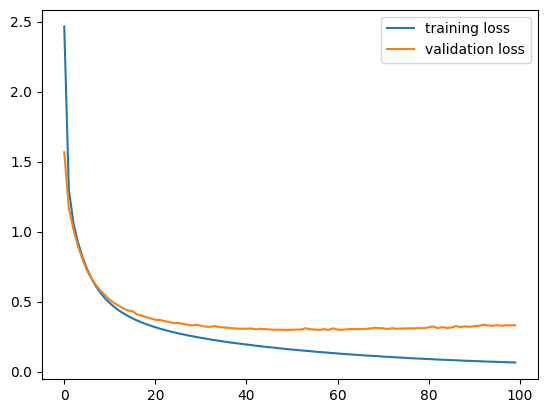

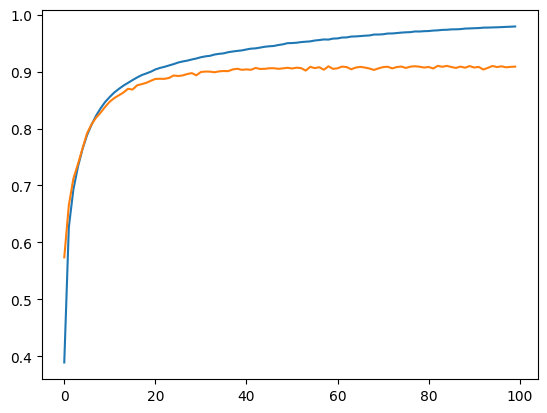

In [1395]:
# plot training and validation loss
plt.plot(history.loss, label="training loss")
plt.plot(history.val_loss, label="validation loss")
plt.legend()
plt.show()

# plot training and validation accuracy
plt.plot(history.accuracy, label="training accuracy")
plt.plot(history.val_accuracy, label="validation accuracy")

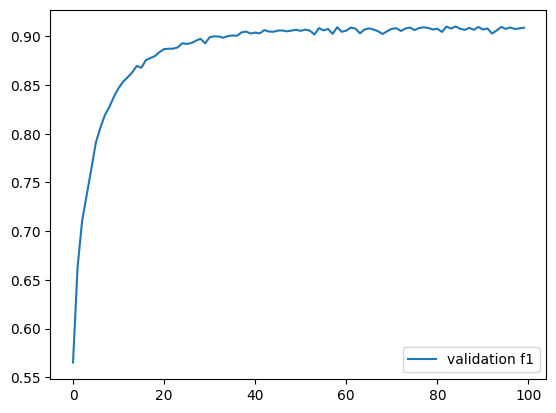

In [1396]:
# plot training and validation f1
plt.plot(history.val_f1, label="validation f1")
plt.legend()
plt.show()


### Testing

In [1392]:
# test model
X_test = test_ds.data.reshape(test_ds.data.shape[0], -1)
y_test = test_ds.targets
test_loss, test_accuracy, f1 = model.evaluate(X_test, y_test)

print(f"test loss: {test_loss}, test accuracy: {test_accuracy}")

test loss: 0.33173834923967577, test accuracy: 0.910673076923077


In [1393]:
# save model
model.save("emnist_model.pkl")

In [1399]:
# load model
model = EmnistModel.load("emnist_model.pkl")

# test model
X_test = test_ds.data.reshape(test_ds.data.shape[0], -1)
y_test = test_ds.targets

# suffle data
X_test, y_test = model.shuffle_data(X_test, y_test)

test_loss, test_accuracy, f1 = model.evaluate(X_test, y_test)

print(f"test loss: {test_loss}, test accuracy: {test_accuracy}")

test loss: 0.3317383492396757, test accuracy: 0.910673076923077
